# Pandas Exercise
## load libraries
code block --> one backtick before and after `bit.ly/2pliIsw`

Multiline codeblock: Three backticks
```
codeline 1
line 2
bal abla
```

urllib to download some data files --> gff file
gff: tsv with header

final goal today: find medium gene length

### Convert to script
man kann am Ende File>Download mehr oder weniger ein python Script generieren. Im Prinzip = alle code cells mergen

In [1]:
# libraries are already installed with Anaconda
# pd ist einfach nur ein Kurzname, damit man weniger tippen muss, wenn man im Laufe des weiteren Codes 
# drauf zugreifen will
import pandas as pd

In [2]:
# von urllib brauchen wir nur eine Funktion. Deshalb wird nur diese importiert (request)
import urllib.request

In [3]:
# download data
source_url = "ftp://ftp.ncbi.nlm.nih.gov/genomes/refseq/bacteria/Escherichia_coli/reference/GCF_000005845.2_ASM584v2/GCF_000005845.2_ASM584v2_genomic.gff.gz"
gff_file = "E_coli.gff.gz"
# bisher nur strings zugewiesen

In [4]:
# jetzt Datenfile runterladen
# Strings wurden nur der Übersichtlichkeit halber eingesetzt
urllib.request.urlretrieve(source_url, gff_file)
# Datei liegt jetzt da, wo Jupyter Notebook gestartet wurde

('E_coli.gff.gz', <email.message.Message at 0x17ca7afb208>)

In [5]:
# load file into python
gff_data = pd.read_csv(gff_file, sep="\t", comment="#", 
                       names=["seqid","source","type","start","end","score","strand","phase","attributes"]) 
# names ... hier werden die Spaltennamen definiert. Das GFF Format hat keine Header, deshalb können 
# die nicht importiert werden, sondern müssen hier manuell zugewiesen werden.
# könnte man natürlich auch einer Listenvariablen zuweisen und dann nur names = Listenvariable nehmen
# jetzt ein dataframe gff_data in python importiert

In [6]:
gff_data

,seqid,source,type,start,end,score,strand,phase,attributes
0,NC_000913.3,RefSeq,region,1,4641652,.,+,.,ID=NC_000913.3:1..4641652;Dbxref=taxon:511145;...
1,NC_000913.3,RefSeq,gene,190,255,.,+,.,"ID=gene-b0001;Dbxref=ASAP:ABE-0000006,ECOCYC:E..."
2,NC_000913.3,RefSeq,CDS,190,255,.,+,0,ID=cds-NP_414542.1;Parent=gene-b0001;Dbxref=Un...
3,NC_000913.3,RefSeq,gene,337,2799,.,+,.,"ID=gene-b0002;Dbxref=ASAP:ABE-0000008,ECOCYC:E..."
4,NC_000913.3,RefSeq,CDS,337,2799,.,+,0,ID=cds-NP_414543.1;Parent=gene-b0002;Dbxref=Un...
...,...,...,...,...,...,...,...,...,...
10116,NC_000913.3,RefSeq,CDS,4639590,4640306,.,-,0,ID=cds-NP_418818.1;Parent=gene-b4401;Dbxref=Un...
10117,NC_000913.3,RefSeq,gene,4640402,4640542,.,+,.,"ID=gene-b4402;Dbxref=ASAP:ABE-0014437,ECOCYC:G..."
10118,NC_000913.3,RefSeq,CDS,4640402,4640542,.,+,0,ID=cds-NP_418819.1;Parent=gene-b4402;Dbxref=Un...
10119,NC_000913.3,RefSeq,gene,4640942,4641628,.,+,.,"ID=gene-b4403;Dbxref=ASAP:ABE-0014442,ECOCYC:E..."


In [7]:
# welche Strukur hat der dataframe
gff_data.shape

(10121, 9)

In [9]:
# type column hat veschiedene Einträge. Wie viele von jeder Sorte?
gff_data["type"] # gibt die Spalte als series zurück (erstmal nur anzeigen lassen)

0        region
1          gene
2           CDS
3          gene
4           CDS
          ...  
10116       CDS
10117      gene
10118       CDS
10119      gene
10120       CDS
Name: type, Length: 10121, dtype: object

In [10]:
gff_data["type"].unique() # zeigt die Einträge, die in dieser Spalte vorkommen als array an

array(['region', 'gene', 'CDS', 'repeat_region', 'mobile_genetic_element',
       'ncRNA', 'exon', 'rRNA', 'tRNA', 'pseudogene', 'sequence_feature',
       'recombination_feature', 'origin_of_replication'], dtype=object)

In [13]:
gff_data["type"].value_counts() # wie viele von jedem Eintrag gibt es?

gene                      4419
CDS                       4379
repeat_region              697
exon                       180
pseudogene                 166
tRNA                        86
ncRNA                       72
mobile_genetic_element      49
sequence_feature            48
rRNA                        22
region                       1
recombination_feature        1
origin_of_replication        1
Name: type, dtype: int64

In [15]:
# die 'gene' Zeilen rausfiltern
gff_data["type"] == "gene"

0        False
1         True
2        False
3         True
4        False
         ...  
10116    False
10117     True
10118    False
10119     True
10120    False
Name: type, Length: 10121, dtype: bool

In [17]:
gene_data = gff_data[gff_data["type"] == "gene"]  # select from gff_data all lines for which the condition is true
# make sub-data-frame

In [18]:
gene_data

,seqid,source,type,start,end,score,strand,phase,attributes
1,NC_000913.3,RefSeq,gene,190,255,.,+,.,"ID=gene-b0001;Dbxref=ASAP:ABE-0000006,ECOCYC:E..."
3,NC_000913.3,RefSeq,gene,337,2799,.,+,.,"ID=gene-b0002;Dbxref=ASAP:ABE-0000008,ECOCYC:E..."
5,NC_000913.3,RefSeq,gene,2801,3733,.,+,.,"ID=gene-b0003;Dbxref=ASAP:ABE-0000010,ECOCYC:E..."
7,NC_000913.3,RefSeq,gene,3734,5020,.,+,.,"ID=gene-b0004;Dbxref=ASAP:ABE-0000012,ECOCYC:E..."
9,NC_000913.3,RefSeq,gene,5234,5530,.,+,.,"ID=gene-b0005;Dbxref=ASAP:ABE-0000015,ECOCYC:G..."
...,...,...,...,...,...,...,...,...,...
10111,NC_000913.3,RefSeq,gene,4636696,4638120,.,+,.,"ID=gene-b4399;Dbxref=ASAP:ABE-0014430,ECOCYC:E..."
10113,NC_000913.3,RefSeq,gene,4638178,4639530,.,+,.,"ID=gene-b4400;Dbxref=ASAP:ABE-0014432,ECOCYC:E..."
10115,NC_000913.3,RefSeq,gene,4639590,4640306,.,-,.,"ID=gene-b4401;Dbxref=ASAP:ABE-0014434,ECOCYC:E..."
10117,NC_000913.3,RefSeq,gene,4640402,4640542,.,+,.,"ID=gene-b4402;Dbxref=ASAP:ABE-0014437,ECOCYC:G..."


In [19]:
# combine: only genes on plus strand
genes_on_plus = gff_data[(gff_data["type"] == "gene") & (gff_data["strand"] == "+")]

In [20]:
genes_on_plus 

,seqid,source,type,start,end,score,strand,phase,attributes
1,NC_000913.3,RefSeq,gene,190,255,.,+,.,"ID=gene-b0001;Dbxref=ASAP:ABE-0000006,ECOCYC:E..."
3,NC_000913.3,RefSeq,gene,337,2799,.,+,.,"ID=gene-b0002;Dbxref=ASAP:ABE-0000008,ECOCYC:E..."
5,NC_000913.3,RefSeq,gene,2801,3733,.,+,.,"ID=gene-b0003;Dbxref=ASAP:ABE-0000010,ECOCYC:E..."
7,NC_000913.3,RefSeq,gene,3734,5020,.,+,.,"ID=gene-b0004;Dbxref=ASAP:ABE-0000012,ECOCYC:E..."
9,NC_000913.3,RefSeq,gene,5234,5530,.,+,.,"ID=gene-b0005;Dbxref=ASAP:ABE-0000015,ECOCYC:G..."
...,...,...,...,...,...,...,...,...,...
10109,NC_000913.3,RefSeq,gene,4636007,4636696,.,+,.,"ID=gene-b4398;Dbxref=ASAP:ABE-0014428,ECOCYC:E..."
10111,NC_000913.3,RefSeq,gene,4636696,4638120,.,+,.,"ID=gene-b4399;Dbxref=ASAP:ABE-0014430,ECOCYC:E..."
10113,NC_000913.3,RefSeq,gene,4638178,4639530,.,+,.,"ID=gene-b4400;Dbxref=ASAP:ABE-0014432,ECOCYC:E..."
10117,NC_000913.3,RefSeq,gene,4640402,4640542,.,+,.,"ID=gene-b4402;Dbxref=ASAP:ABE-0014437,ECOCYC:G..."


In [22]:
%who # % spricht zu Jupyter notebook. Es werden jetzt alle in diesem Notebook genererierten Namen angezeigt

gene_data	 genes_on_plus	 gff_data	 gff_file	 pd	 source_url	 urllib	 


In [23]:
# Exportieren ...
# nach .to_ TAB, dann werden die Export-Optionen angezeigt
genes_on_plus.to_excel("excel_export_genes_on_plus.xlsx")

In [26]:
# calculate gene length and add as column to dataframe
gene_data["length"] = gene_data["end"] - gene_data["start"] + 1# das gibt eine Warnung, aber die kann hier erstmal ignoriert werden
# das ist weil Python(oder Jupyter?) weiß, dass gene_data nur ein Teil eines größeren dataframes ist. Ist hier egal.

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [27]:
gene_data

,seqid,source,type,start,end,score,strand,phase,attributes,length
1,NC_000913.3,RefSeq,gene,190,255,.,+,.,"ID=gene-b0001;Dbxref=ASAP:ABE-0000006,ECOCYC:E...",66
3,NC_000913.3,RefSeq,gene,337,2799,.,+,.,"ID=gene-b0002;Dbxref=ASAP:ABE-0000008,ECOCYC:E...",2463
5,NC_000913.3,RefSeq,gene,2801,3733,.,+,.,"ID=gene-b0003;Dbxref=ASAP:ABE-0000010,ECOCYC:E...",933
7,NC_000913.3,RefSeq,gene,3734,5020,.,+,.,"ID=gene-b0004;Dbxref=ASAP:ABE-0000012,ECOCYC:E...",1287
9,NC_000913.3,RefSeq,gene,5234,5530,.,+,.,"ID=gene-b0005;Dbxref=ASAP:ABE-0000015,ECOCYC:G...",297
...,...,...,...,...,...,...,...,...,...,...
10111,NC_000913.3,RefSeq,gene,4636696,4638120,.,+,.,"ID=gene-b4399;Dbxref=ASAP:ABE-0014430,ECOCYC:E...",1425
10113,NC_000913.3,RefSeq,gene,4638178,4639530,.,+,.,"ID=gene-b4400;Dbxref=ASAP:ABE-0014432,ECOCYC:E...",1353
10115,NC_000913.3,RefSeq,gene,4639590,4640306,.,-,.,"ID=gene-b4401;Dbxref=ASAP:ABE-0014434,ECOCYC:E...",717
10117,NC_000913.3,RefSeq,gene,4640402,4640542,.,+,.,"ID=gene-b4402;Dbxref=ASAP:ABE-0014437,ECOCYC:G...",141


In [28]:
# mean gene lenght
gene_data["length"].mean()

912.7795881421137

In [29]:
# median gene lenght
gene_data["length"].median()

807.0

## Plotting

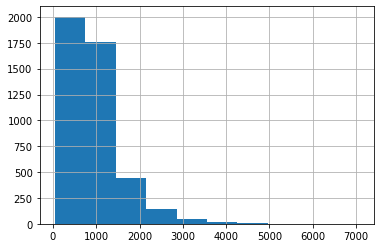

In [31]:

# matplotlib ist mit pandas bereits importiert (das ist eine Jupyter besonderheit)
%matplotlib inline    
# normaleweise macht matplotlib neues Fenster oder schreibt in Datei. Das sagt Jupyter es 
# soll inline geplottet werden
gene_data["length"].hist()

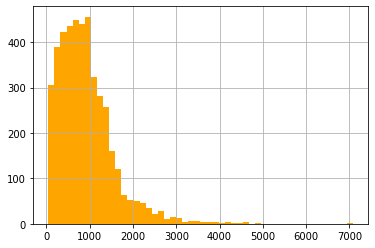

In [33]:
gene_data["length"].hist(bins=50, color="orange")  # modify the histogram

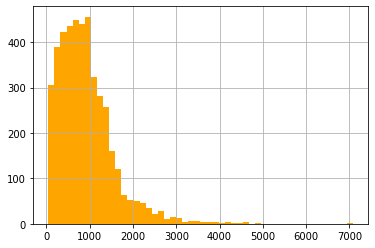

In [34]:
# save it to a file
# save histogramm into access object ax
# nicht so ganz klar, aber sowas in der Art wie ein subplot
ax = gene_data["length"].hist(bins=50, color="orange")  # ax is convention, aber halt nur ein name
fig = ax.get_figure()
fig.savefig("histogram.pdf")

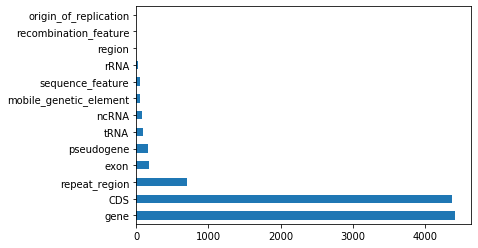

In [39]:
# https://appdividend.com/2019/01/26/matplotlib-tutorial-with-example-python-jupyter-notebook-course/
gff_data["type"].value_counts().plot(kind='barh')

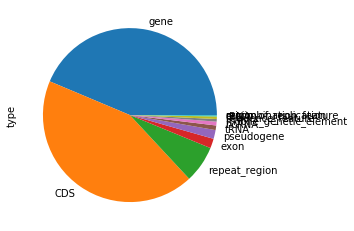

In [40]:
gff_data["type"].value_counts().plot(kind='pie')